## Sources
### Data
* “Blockchain ETL”, a collection of Python scripts developed by Nansen.ai. These scripts feed data into the aforementioned BigQuery public datasets.
* https://console.cloud.google.com/bigquery?pli=1&project=pristine-lodge-284302&ws=!1m5!1m4!4m3!1sbigquery-public-data!2scrypto_ethereum!3stransactions!1m5!1m4!1m3!1spristine-lodge-284302!2sbquxjob_5c45b55e_17a2a724075!3sUS&j=bq:US:bquxjob_5c45b55e_17a2a724075&page=queryresults

### Strategy
* https://towardsdatascience.com/data-science-for-blockchain-understanding-the-current-landscape-c136154c367e

In [1]:
import pandas as pd
from main import MethodHandler
from web3 import Web3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

SyntaxError: invalid syntax (<ipython-input-1-b69719aaf604>, line 7)

* Nonce - number of transactions made by sender prior to this one
* Value - Value transferred in Wei
* gas - Gas paid by sender in Wei
* gas_price - Gas price provided by sender in Wei
* receipt_cumulative_gas_used - The total amount of gas used when this transaction was executed in the block
* receipt_gas_used - The amount of gas used by this specific transaction alone

In [13]:
mh = MethodHandler()

# Connect to Ethereum node
web3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/58ea22f2caa14187bd2b8c0682c84848'))

In [14]:
df = pd.read_csv("eth_txs_201701.csv")
# Eliminating bad data row
df.fillna(0, inplace=True)
df

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x063d858c8ee9349d1cd5bad972f42857bb042b4fadf0...,9,0,0x6887bf06ad231932a8ac524d80a3b357c9d1e268,0x293c008e3060746f728ea59565b7a33dc68802be,0,4000000,36000000000,0xbeabacc8000000000000000000000000adc46ff54349...,73496,73496,0,0xc6ea95c89d68ebe6f27e482113ad8a6844e5cdc80f1d...,0.0,2017-01-14 02:39:40 UTC,2992020,0x092a80f2aba6424297c148e05668fb8cd72318cfefdb...
1,0xf32858cc653aff18441c1d55066e53da7420a989f222...,94,9,0x94179eadc17135842c233044b26fbcded63645b3,0x318f2bee1f51076749d2c9a6f22f306567b60df2,0,800000,20000000000,0x19c12795383864353533623434383934356562613661...,942246,709050,0,0xb80b439c1b5ec25e600b459f275a8125ed9287725772...,0.0,2017-01-14 05:27:00 UTC,2992711,0x224d4e66a4e2d1b58ad093573dad803785b22890a8e2...
2,0x51decb2be81cd9f26593fe0f6cedfbb8893162dde2a5...,9,4,0xc7c7d67972301a5d968056a45d79a968a7820338,0xf0f31a0a83fc0d83177834bbdce23f9fb2639818,20000000000000000,348160,20000000000,0xfa4e5e5a000000000000000000000000000000000000...,353936,248160,0,0xc3f16ee1cc065fa9c2b6db0c6e39e0805ca86248aae0...,0.0,2017-01-14 03:05:18 UTC,2992129,0xcd2de48db4826b561e79320973845d79e8cffd6c3343...
3,0x6f00ee1395c25a9cfbc1b4202fee8a025e36b3649c27...,0,3,0x8bfbff27b96bb872e741e08478da18cdc48353d6,0x1c39ba39e4735cb65978d4db400ddd70a72dc750,1009967500000000000,128000,20000000000,0x,169594,31626,0,0xf25e93804becd29e883280335a1ff46a47b654bb3a47...,0.0,2017-01-14 00:59:49 UTC,2991616,0x5ff729489d258efebd4c68b60ffdd000782b40936a6b...
4,0xebfbf661461d49765dcc6bf418f0e6940d6163d576b9...,0,11,0x6ebe376d8f11bfb9ed5e4aef70266603caff7883,0x1c39ba39e4735cb65978d4db400ddd70a72dc750,56997440000000000000,128000,20000000000,0x,367294,31626,0,0xd2a7fae53ec53d60bda08f3cda38103c63f030d22bd6...,0.0,2017-01-14 11:24:50 UTC,2994199,0x2f0147092a884d102c735003d669e063043931a8874a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0x58ca510226be5de9cea242bd0b7118f5936c65466e48...,161905,38,0x1e9939daaad6924ad004c2560e90804164900341,0xecbdc9ccf840d6867045055a48a8730f44e7d510,1000816079263749100,39000,20000000000,0x,1246370,21000,0,0xc16652db121a0a80a66d3a5eec1aba9074b261e05548...,0.0,2017-01-14 17:15:59 UTC,2995728,0x1f2d0b41a4d887e2cd48b4400e9a1d3318cfa1e34b2e...
15995,0x6cb11dd66972ae09deebacd3667cdfe21cec73d2efa0...,161906,40,0x1e9939daaad6924ad004c2560e90804164900341,0xfb044baacb0846e848ea790fdeaa693c0a0687de,1005314006565995400,39000,20000000000,0x,1290270,22900,0,0x574497e2ab4b297846ea5ec9e6a71e9552cc258875bf...,0.0,2017-01-14 17:15:59 UTC,2995728,0x1f2d0b41a4d887e2cd48b4400e9a1d3318cfa1e34b2e...
15996,0x841c79889971255d8005bd43787b2e450be3a3774133...,162195,10,0x1e9939daaad6924ad004c2560e90804164900341,0xb4b24d8b87631ddc39b661241db6270789b72bd0,1001334167886084600,39000,20000000000,0x,294103,21000,0,0x21186aec2171296e257b6b10cf1bcc10b2cf8d8beffc...,0.0,2017-01-14 21:14:23 UTC,2996752,0xb5b0dcf167e529dd22cbd2780730891714949dc832af...
15997,0xf2d01b3399a66ac31f61632fbafe4bf8fac2188b26da...,162199,20,0x1e9939daaad6924ad004c2560e90804164900341,0xdd57fadf370912eebbced58345718c05363f8577,1006165751796247900,39000,20000000000,0x,506003,21000,0,0xf1539f4fc9e545fcf573d69c26ab90eb7a91b4bc4b41...,0.0,2017-01-14 21:14:23 UTC,2996752,0xb5b0dcf167e529dd22cbd2780730891714949dc832af...


#### Avg Stats

In [15]:
value_map_obj = map(lambda x: web3.fromWei(int(x), 'ether'), df["value"])
gas_map_obj = map(lambda x: web3.fromWei(int(x), 'ether'), df["gas"])
gas_used_tx_map_obj = map(lambda x: web3.fromWei(int(x), 'gwei'), df["receipt_cumulative_gas_used"])

print(f"Avg value of Tx (Ether): {np.mean(list(value_map_obj))}")
print(f"Avg gas paid by sender (Ether): {np.mean(list(gas_map_obj))}")
print(f"Avg amount of gas used in Tx (Gwei): {np.mean(list(gas_used_tx_map_obj))}")

Avg value of Tx (Ether): 35.22236297332190996252215763
Avg gas paid by sender (Ether): 7.637139189949371835739733733E-14
Avg amount of gas used in Tx (Gwei): 0.0004907339921245077817363585224


#### Most active sender

In [16]:
most_active_sender = df["from_address"].value_counts().index[0]
mas_df = df.loc[df["from_address"] == most_active_sender]

value_map_obj = map(lambda x: web3.fromWei(int(x), 'ether'), mas_df["value"])
gas_map_obj = map(lambda x: web3.fromWei(int(x), 'ether'), mas_df["gas"])
gas_used_tx_map_obj = map(lambda x: web3.fromWei(int(x), 'gwei'), mas_df["receipt_cumulative_gas_used"])

print(f"Total number of transactions: {len(mas_df)}")
print(f"Avg value of Tx (Ether): {np.mean(list(value_map_obj))}")
print(f"Avg gas paid by sender (Ether): {np.mean(list(gas_map_obj))}")
print(f"Avg amount of gas used in Tx (Gwei): {np.mean(list(gas_used_tx_map_obj))}")

Total number of transactions: 2482
Avg value of Tx (Ether): 0.4452512074577523139016921837
Avg gas paid by sender (Ether): 5E-14
Avg amount of gas used in Tx (Gwei): 0.0008197924157937147461724415794


In [17]:
# def convert_dates(timestamps, input_date_format="%Y-%m-%d", output_date_format='%m-%d-%Y'):
#     for stamp in timestamps:
#         date_obj = datetime.strptime(stamp.split(" ")[0], input_date_format)
#         yield date_obj.strftime(output_date_format)
        
# dates = list(convert_dates(df["block_timestamp"]))

In [18]:
df.sort_values("block_timestamp", ascending=True, inplace=True)

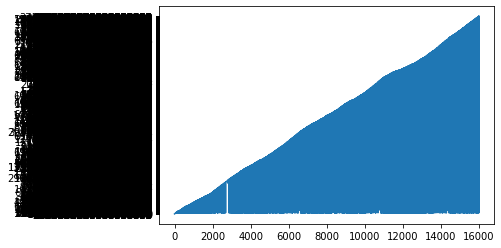

In [20]:
plt.plot(range(len(df["value"])), df["value"])
plt.show()